# Kinematic Bicycle Model Representation of a Car

 Bicycle model is a really simple and powerful model that is commonly used to represent a car in order to read the cars behaviour according to the set velocity and steering angle (or Rate of change in steering angle). The model is commonly used to develop simple alogorithms for cars motion in a set trajectory.
 
 This model is based on the Center Of Gravity frame referance. The equations defining the vehicles motion are :
 
\begin{align*}
\dot{x}_c &= v \cos{(\theta + \beta)} \\
\dot{y}_c &= v \sin{(\theta + \beta)} \\
\dot{\theta} &= \frac{v \cos{\beta} \tan{\delta}}{L} \\
\dot{\delta} &= \omega \\
\beta &= \tan^{-1}(\frac{l_r \tan{\delta}}{L})
\end{align*}

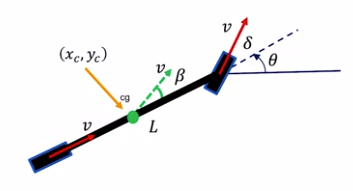

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

class Bicycle():
    def __init__(self):
        self.xc = 0
        self.yc = 0
        self.theta = 0
        self.delta = 0
        self.beta = 0
        
        self.L = 2
        self.lr = 1.2
        self.w_max = 1.22
        
        self.sample_time = 0.01
        
    def reset(self):
        self.xc = 0
        self.yc = 0
        self.theta = 0
        self.delta = 0
        self.beta = 0

Here, we design a function step that changes the values of the state variables according to the given inputs of v (i.e. velocity) and w (i.e. rate of change of steering angle). This function is designed assuming that each step is taken at an interval of time that is very very small. This helps us we can imply by this that change in various variables during that time interval is negligible.

In [6]:
class Vehicle(Vehicle):
    def step(self, throttle, alpha):
        # ==================================
        #  Implement vehicle model here
        # ==================================
        
        # Calculating w_w
        w_w = self.GR * self.w_e
        # Calculating s
        s = (w_w * self.r_e / self.v) - 1
        # Claculating F_x
        F_x = self.F_max
        if s<1 and s>-1 :
            F_x = self.c * s
        # Calculating F_aero
        F_aero = self.c_a * (self.v ** 2)
        # Calculating R_x
        R_x = self.c_r1 * self.v
        # Calculating F_g
        F_g = self.m * self.g * np.sin(alpha)
        # Calculating F_load
        F_load = F_aero + R_x + F_g
        # Setting a
        self.a = (F_x - F_load) / self.m
        # Setting v
        self.v = self.a * self.sample_time + self.v
        # Setting x
        self.x = self.v * self.sample_time + self.x
        # Calculating T_e
        T_e = throttle * (self.a_0 + (self.a_1 * self.w_e) + (self.a_2 * (self.w_e ** 2)))
        # Setting w_e_dot
        self.w_e_dot = (T_e -(self.GR * self.r_e * F_load))/self.J_e
        # Setting w_e
        self.w_e = self.w_e_dot * self.sample_time + self.w_e
        
        pass

In the next cell we try to make a trajectory in the shape of an horizontal "8". We try to do this at a constant speed and changing the rate of change of steering angle accordingly.

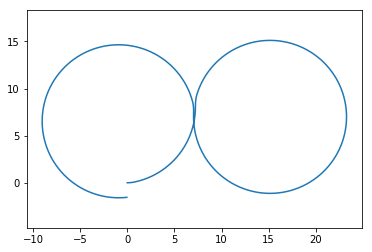

In [34]:
sample_time = 0.01
time_end = 30
model = Bicycle()
model.reset()

# Parameter setup for making an 8-figure

t_data = np.arange(0,time_end,sample_time)
x_data = np.zeros_like(t_data)
y_data = np.zeros_like(t_data)
v_data = np.zeros_like(t_data)
w_data = np.zeros_like(t_data)

v_data[:] = 3.351
w_data[0:20] = 1.22
w_data[355:395] = -1.22
w_data[1855:1895] = 1.22

for i in range(t_data.shape[0]):
    x_data[i] = model.xc
    y_data[i] = model.yc
    model.step(v_data[i], w_data[i])

plt.axis('equal')
plt.plot(x_data, y_data)
plt.show()

As you can see, the result is not a perfect 8. This is because for a perfect 8 we need to change the speed as well as the rate of change of steering angle because of the limit on maximum rate in change of steering angle. This leads to a distortion in the trajectory and hence results in an imperfect final result.